<a href="https://www.kaggle.com/code/hashemi221022/google-stock-prediction-with-rnn?scriptVersionId=141315060" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1><center style="font-family:newtimeroman;font-size:150%; border-radius:50px; padding: 20px; color: #75f8f2; background-color: black"> Google Stock Prediction With RNN</center></h1>
<center><img style="border-radius: 20px 20px 20px 20px" src='https://images.barrons.com/im-93053?width=700&height=467' height=500px width=900px border-radius=55%></center><br>

<div style="border-radius:50px; padding: 20px; background-color: black; font-size:120%; text-align:left">

<h3 align="left"><font color= white >About Data:</font></h3>
    
<p><font color=#75f8f2>Approximately Dataset 
Setting 
All of the professionals, learners in DL learning will unquestionably come over RNN and LSTM's. So I thought let me include a dataset that can be utilized as a venturing stone into the Stock forecasts. 
Substance 
This dataset contains 14 columns and 1257 Columns. Each columns are alloted to a quality and lines contains the values for that property. 
The 14 columns are: 
<font color='orange'>
        <ol >
            <li>symbol : Title of the company (in this case Google).</li> 
            <li>date : year and date</li> 
            <li>close: closing of stock esteem</li> 
            <li>high: most noteworthy esteem of stock at that day</li> 
            <li>low: most reduced esteem of stock at that day</li> 
            <li>open: opening esteem of stock at that day</li> 
            <li>volume</li> 
            <li>adjClose</li> 
            <li>adjHigh</li> 
            <li>adjLow</li> 
            <li>adjOpen</li> 
            <li>adjVolume</li> 
            <li>divCash</li> 
            <li>splitFactor</li> 
    </ol>
 </font>
</font></p>

 <center><button type="button"><a href="https://www.kaggle.com/datasets/shreenidhihipparagi/google-stock-prediction">Google Stock Data</a></button><center
                                                                           

  



In [1]:
# Get Google API
# pip install yfinance                        

In [2]:
# Remove Warnings
import warnings
warnings.filterwarnings('ignore')

# <p style="background-color:black; font-family:calibri; color:#75f8f2; font-size:170%; text-align:center; border-radius:30px 30px;">1. The First Step | Import library</p>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import preprocessing
from sklearn import metrics 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import joblib

# <p style="background-color:black; font-family:calibri; color:#75f8f2; font-size:170%; text-align:center; border-radius:30px 30px;">1. The Second Step | preparing Dataset</p>

In [4]:
# Read Dataset
Data = pd.read_csv("/kaggle/input/google-stock-prediction/GOOG.csv")
Data

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [5]:
# Checking The Imported Dataset
Data.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [6]:
# Get Info
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [7]:
# Create DataFrame From Data
df = pd.DataFrame(Data)
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [8]:
# Remove %h-%m-%s From Date Column
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%d-%m-%Y')
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,14-06-2016,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,15-06-2016,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,16-06-2016,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,17-06-2016,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,20-06-2016,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,07-06-2021,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,08-06-2021,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,09-06-2021,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,10-06-2021,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [9]:
# Checking The Type Of Data Column(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [10]:
# Convert Object To Datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True)


In [11]:
# Remove 'symbol' Column From Dataset
df.drop(columns= 'symbol', axis=1,inplace=True )

In [12]:
# Checking The Type Of Data Column(Datatime64) And Remove 'symbol' Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1258 non-null   datetime64[ns]
 1   close        1258 non-null   float64       
 2   high         1258 non-null   float64       
 3   low          1258 non-null   float64       
 4   open         1258 non-null   float64       
 5   volume       1258 non-null   int64         
 6   adjClose     1258 non-null   float64       
 7   adjHigh      1258 non-null   float64       
 8   adjLow       1258 non-null   float64       
 9   adjOpen      1258 non-null   float64       
 10  adjVolume    1258 non-null   int64         
 11  divCash      1258 non-null   float64       
 12  splitFactor  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(2)
memory usage: 127.9 KB


# <p style="background-color:black; font-family:calibri; color:#75f8f2; font-size:170%; text-align:center; border-radius:30px 30px;">3. The Third Step | Visualization Dataset </p>

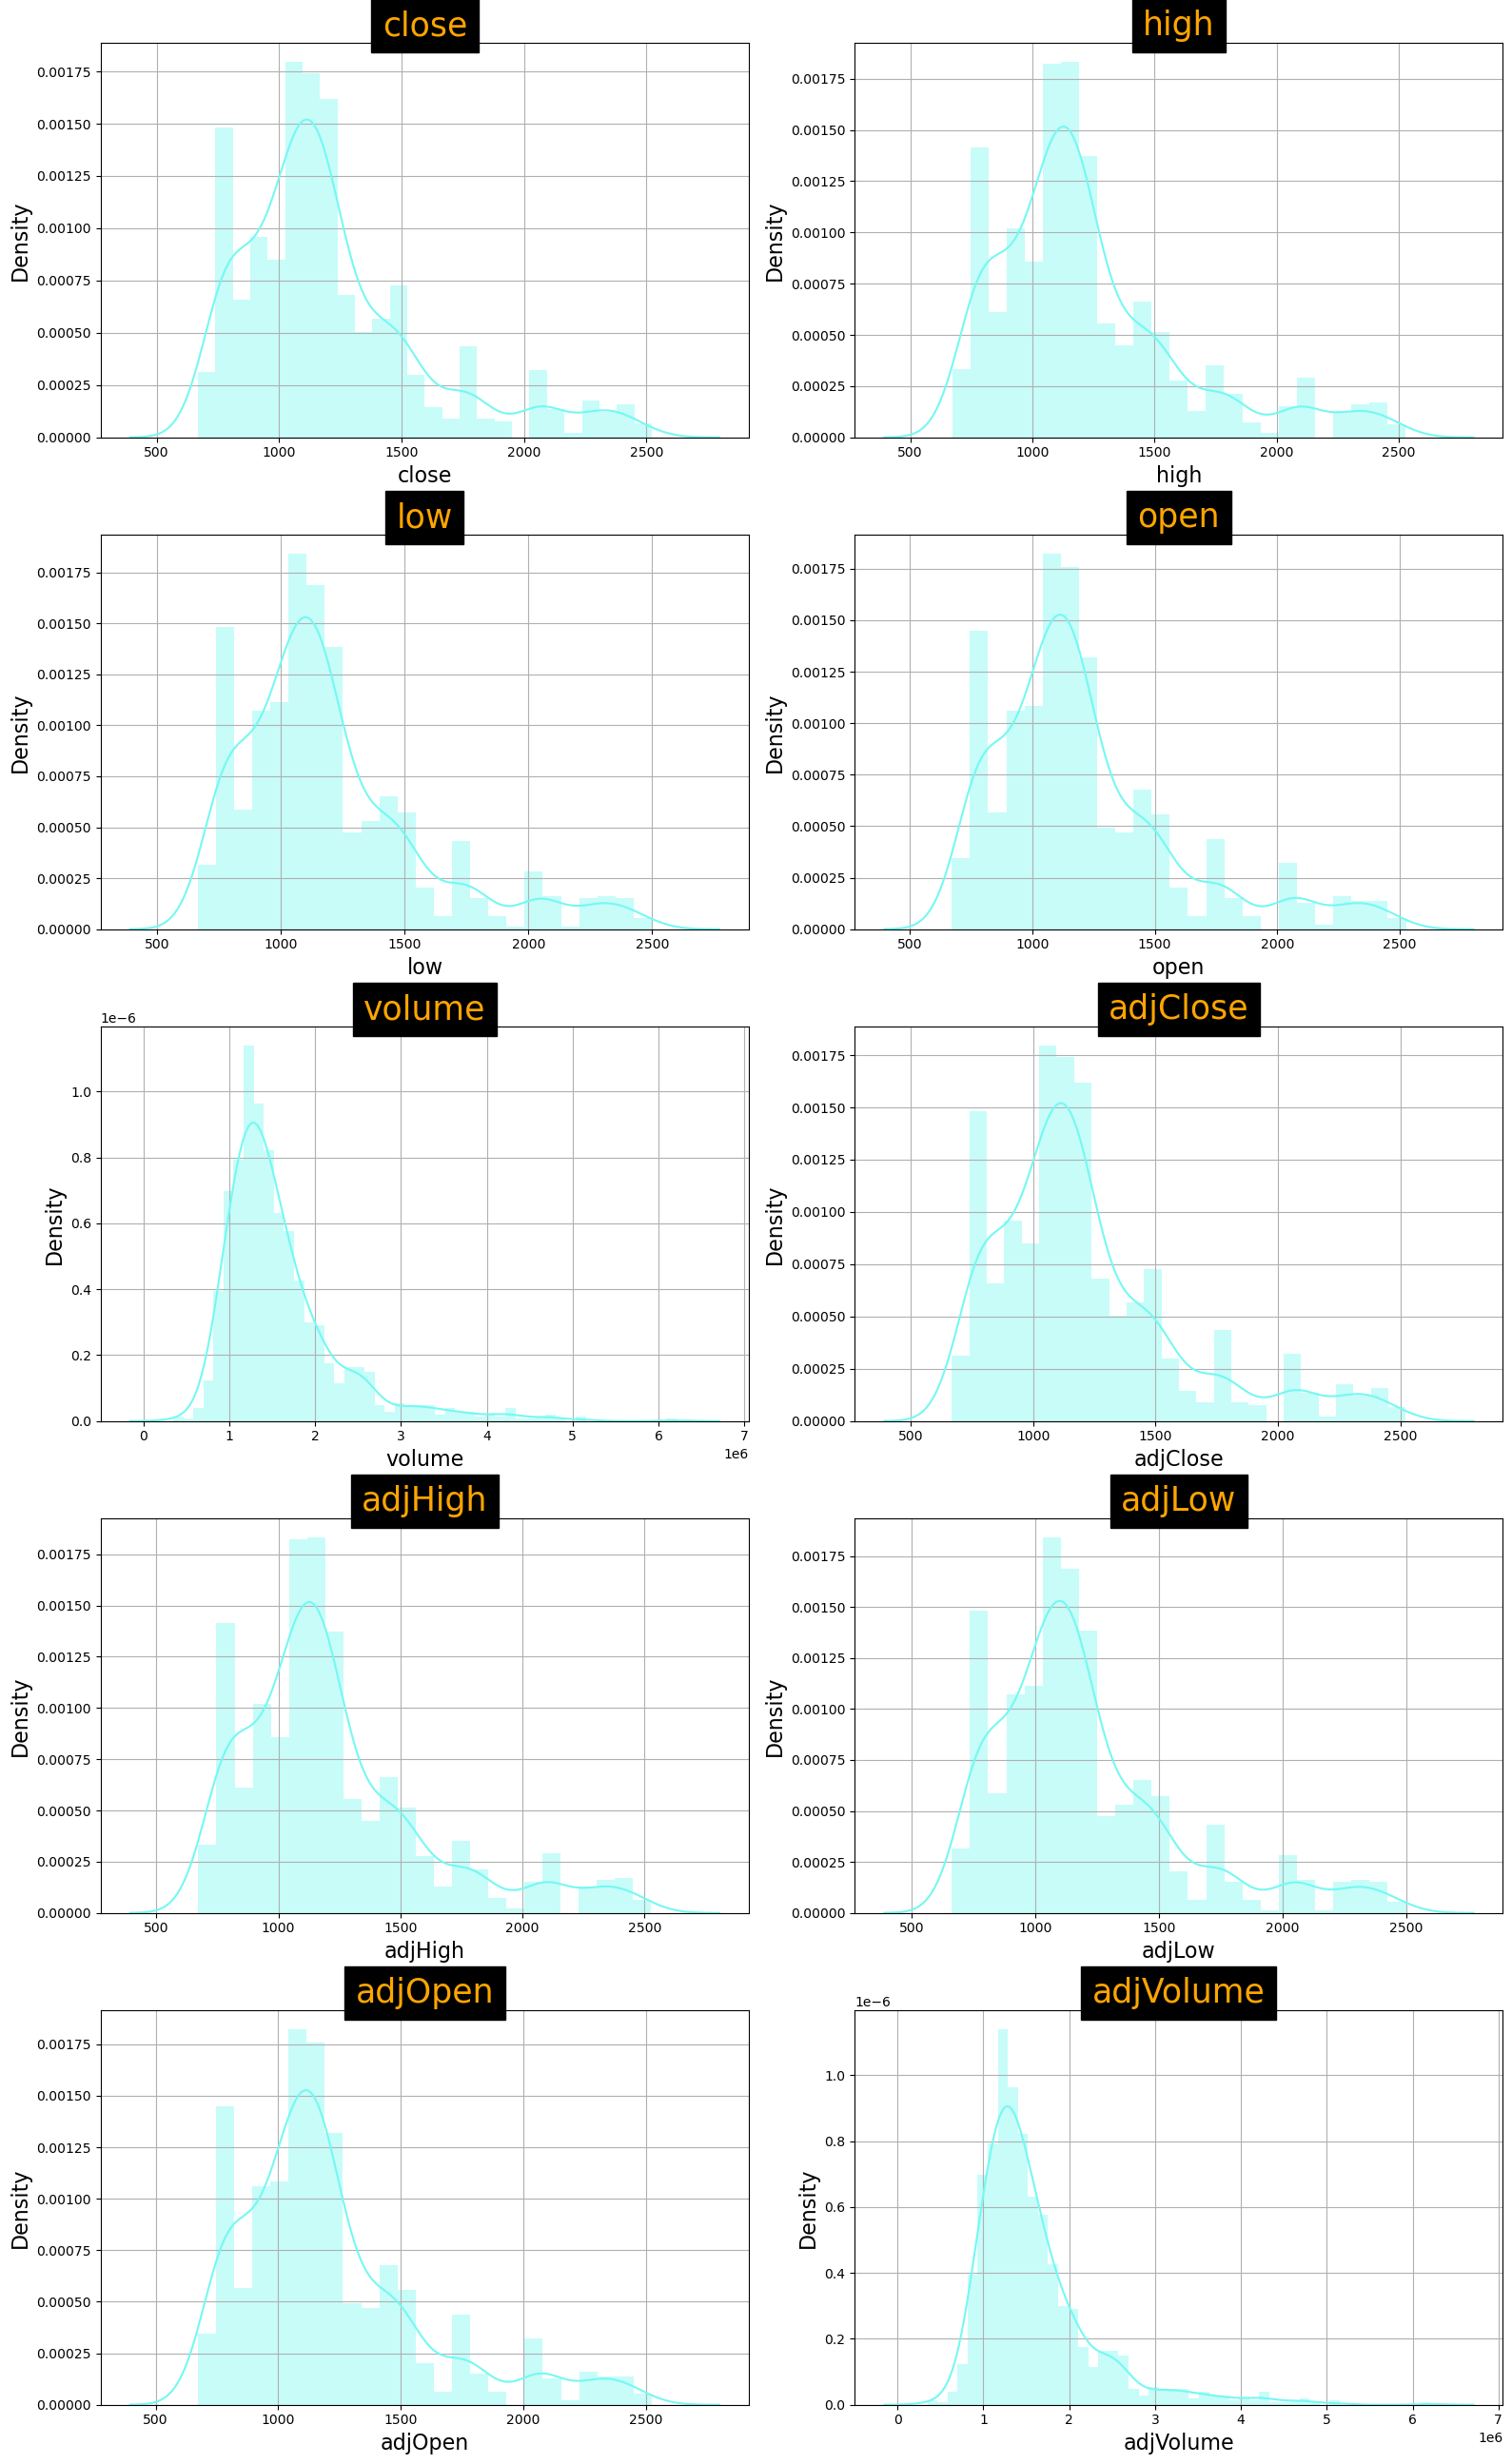

In [13]:
# Checking distribution

features = ['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume']
sns.set_palette("PiYG")
plt.figure(figsize=(16,26))
for idx, column in enumerate(features): 
    plt.subplot(5, 2, idx + 1)
    sns.distplot(df, x=df[column], color='#75f8f2')
    plt.title(column, backgroundcolor='black', color='orange', fontsize=25)
    plt.xticks()
    plt.xlabel(column, fontsize=16)
    plt.ylabel('Density', fontsize=16)
    plt.grid()

plt.tight_layout()
plt.show()    

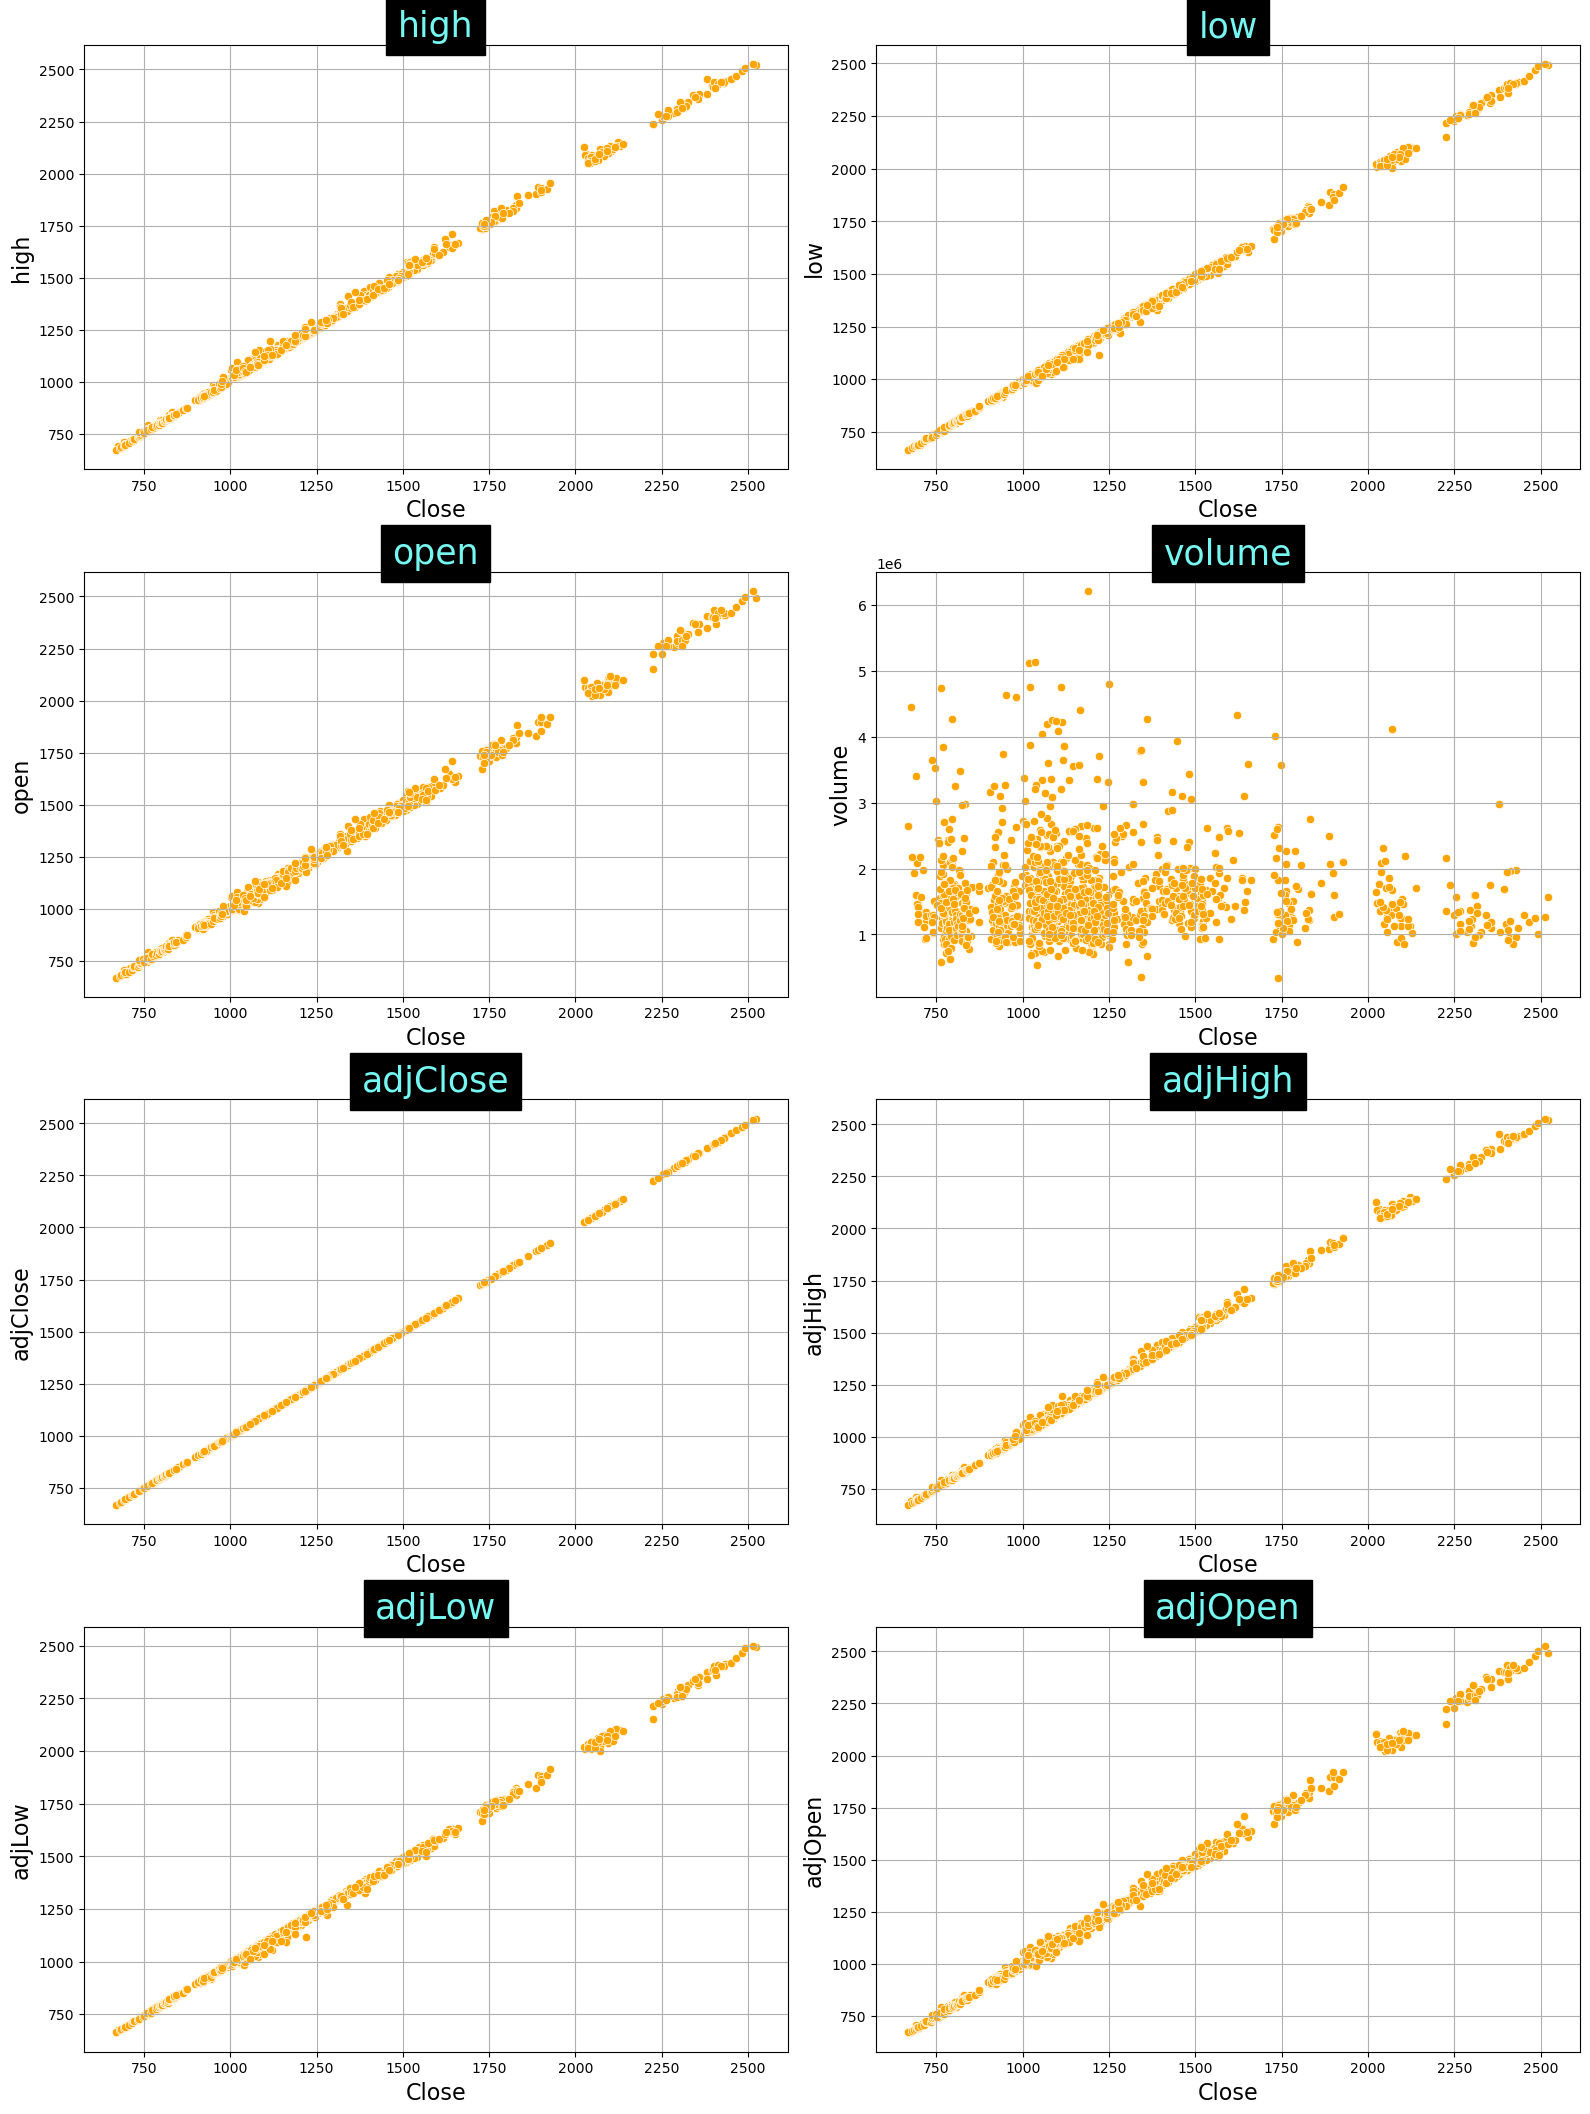

In [14]:
# checking The Behavior Of Features In Relation To 'adjcloce'
features = ['high', 'low', 'open', 'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen']
sns.set_palette("PiYG")
plt.figure(figsize=(16,26))
for idx, column in enumerate(features):
    plt.subplot(5, 2,  idx + 1)
    sns.scatterplot(x =df['close'], y=df[column] , data = df, color='orange')
    plt.title(column, backgroundcolor='black', color='#75f8f2', fontsize=25)
    plt.xlabel('Close', fontsize=16)
    plt.ylabel(column, fontsize=16)
    plt.grid()
plt.tight_layout()
plt.show()



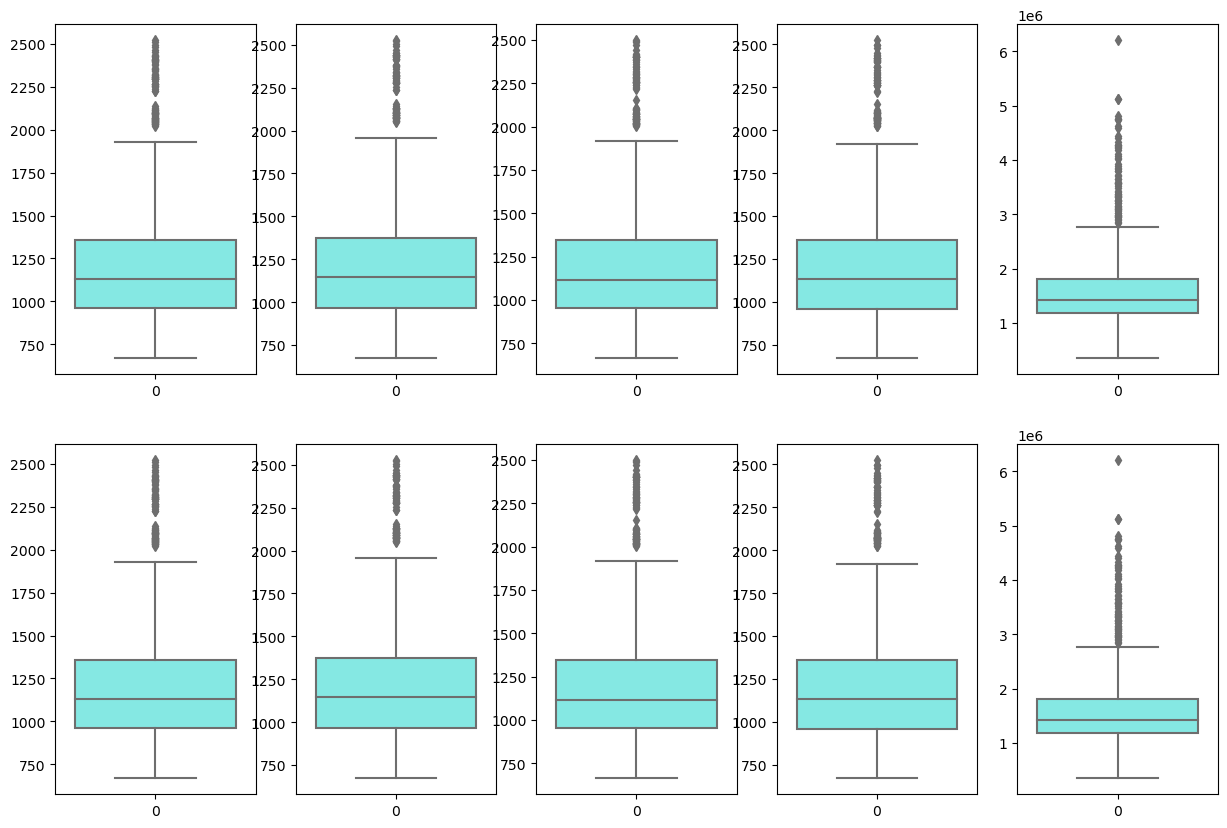

In [15]:
# Subplot
features = ['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume']
fig  = plt.subplots(nrows = 3, ncols = 3,figsize = (15,10))
for i in range(len(features)) :
    plt.subplot(2,5,i+1)
    ax = sns.boxplot(df[features[i]], color="#75f8f2")

plt.show()

In [16]:
# Creat new Dataset For plot
df1 = df.drop(['date', 'divCash', 'splitFactor'], axis=1)
df1

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume
0,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065
1,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517
2,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471
3,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357
4,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538
...,...,...,...,...,...,...,...,...,...,...
1253,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453
1254,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253
1255,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337
1256,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733


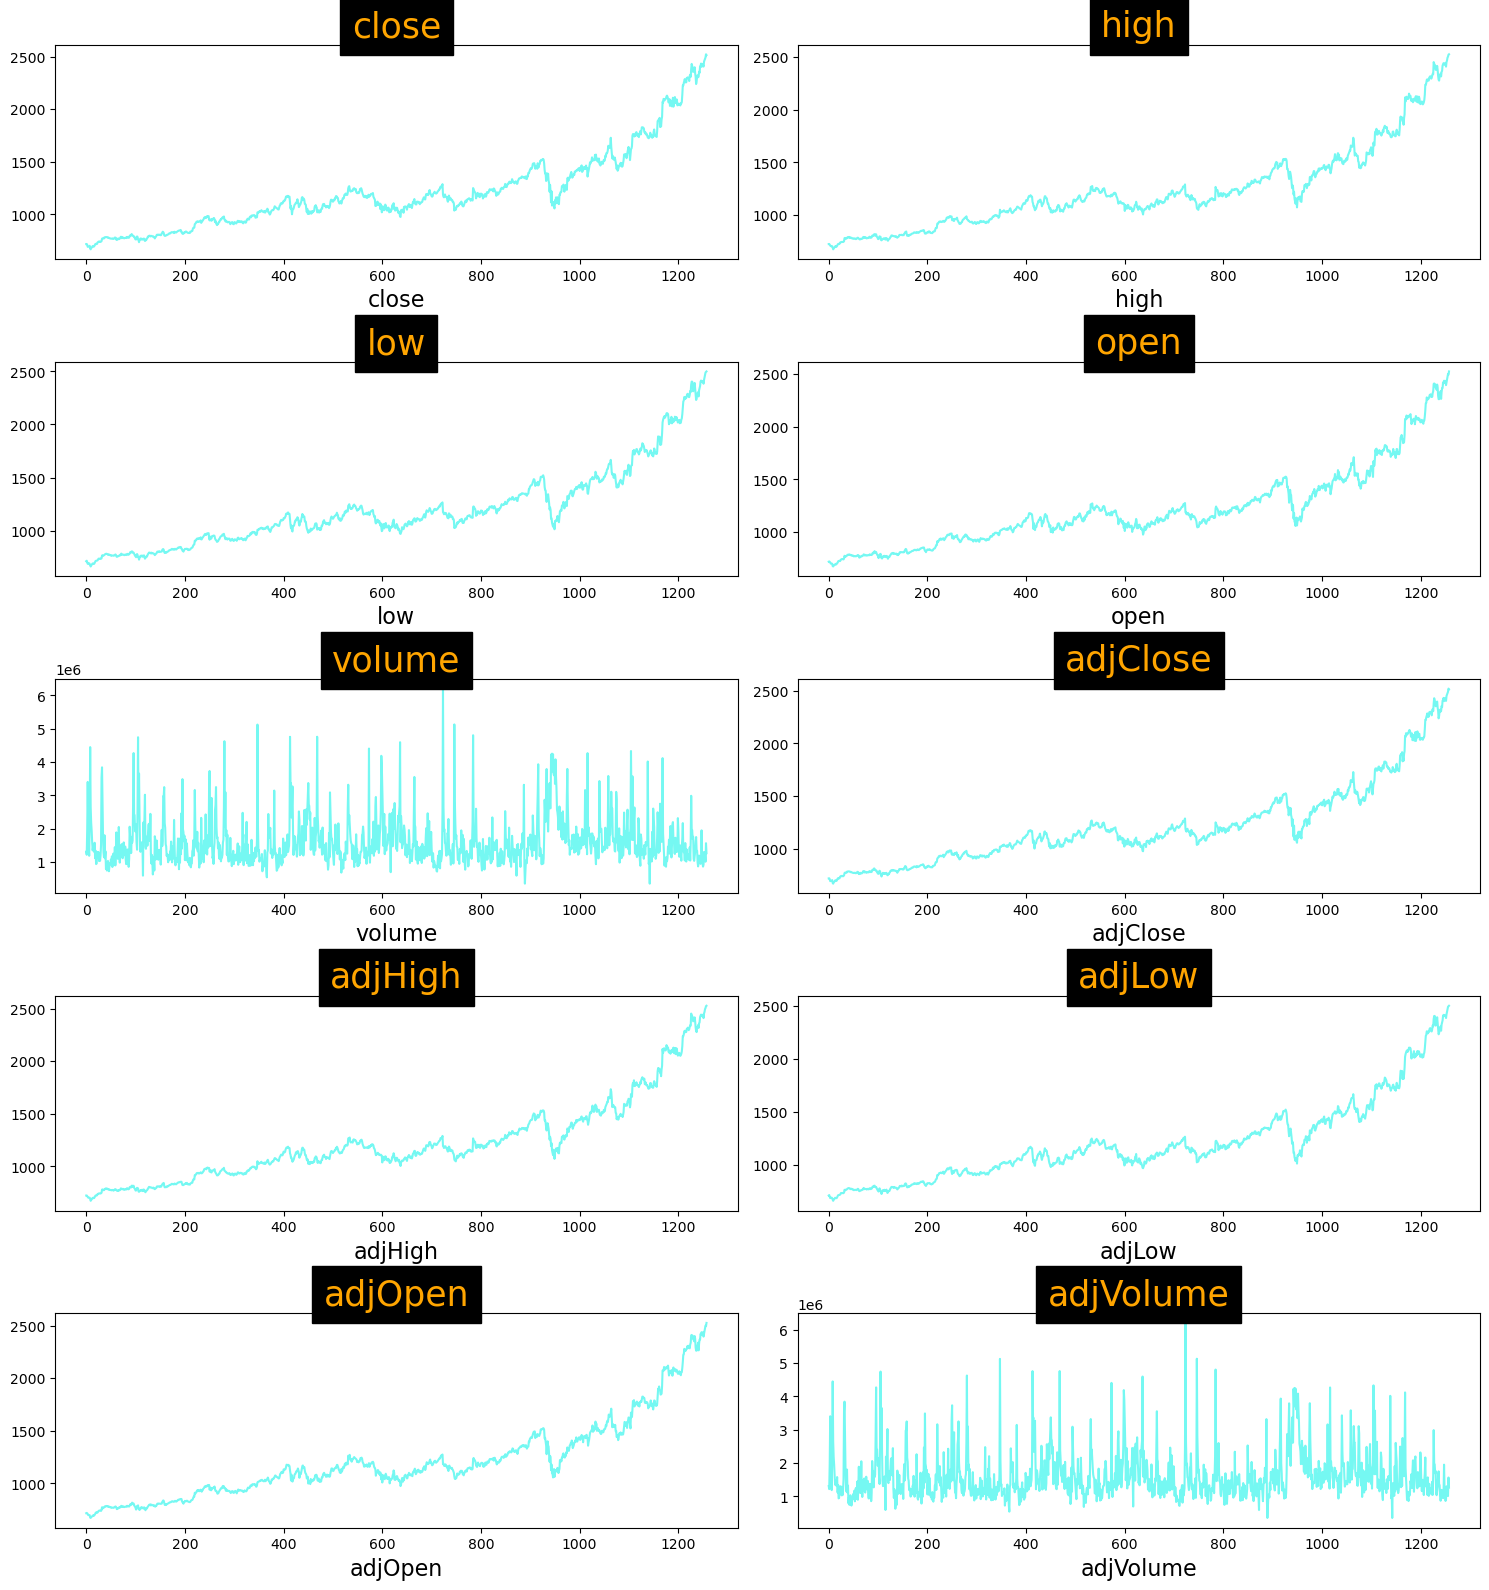

In [17]:
plt.figure(figsize = (15,25))
for idx, i in enumerate(df1):
    plt.subplot(8, 2, idx + 1)
    plt.plot(df1.index.values,df1[i], color='#75f8f2')
    plt.title(i,backgroundcolor='black',color='orange',fontsize=25)
    plt.xlabel(i, size = 16)
plt.tight_layout()                     
plt.show()

<div style="border-radius:50px; padding: 20px; background-color: black; font-size:120%; text-align:left">

<h3 align="left"><font color= white >What is <font color= orange>MA</font>?!:</font></h3>
    
<p><font color=#75f8f2>A moving average <font color= orange>(MA)</font>, a popular technical indicator, smoothes price movements by removing the noise from erratic short-term price swings. There are numerous ways to build moving averages, and the number of days used for the averaging interval might vary. The average is calculated over a predetermined time frame, such as weeks, days, hours, minutes. 
<font color='orange'>


In [18]:
plt.style.use("fivethirtyeight")

In [19]:
df1= df.copy()

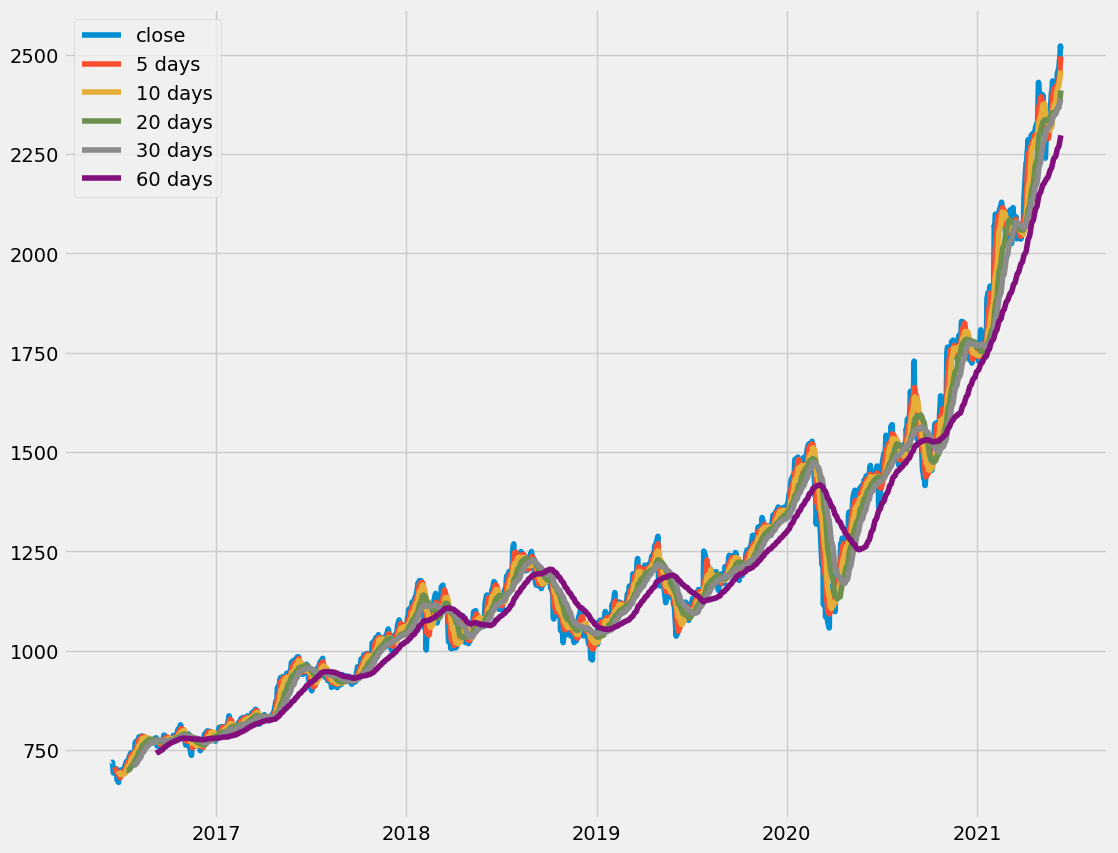

In [20]:
ma_days = [5, 10, 20, 30, 60]

for MA in ma_days:
    column_name = f"MA in {MA} days"
    df1[column_name] = df1['close'].rolling(MA).mean()   

plt.figure(figsize=(12,10))

plt.plot(df1['date'],df1['close'],label='close')
plt.plot(df1['date'],df1['MA in 5 days'],label= '5 days')
plt.plot(df1['date'],df1['MA in 10 days'],label= '10 days')
plt.plot(df1['date'],df1['MA in 20 days'],label= '20 days')
plt.plot(df1['date'],df1['MA in 30 days'],label= '30 days')
plt.plot(df1['date'],df1['MA in 60 days'],label= '60 days')
plt.legend()
plt.show()

In [21]:
# Cheking DataFram
df1

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,MA in 5 days,MA in 10 days,MA in 20 days,MA in 30 days,MA in 60 days
0,2016-06-14,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0,NaN,NaN,NaN,NaN,NaN
1,2016-06-15,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0,NaN,NaN,NaN,NaN,NaN
2,2016-06-16,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0,NaN,NaN,NaN,NaN,NaN
3,2016-06-17,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0,NaN,NaN,NaN,NaN,NaN
4,2016-06-20,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0,706.596,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0,2434.710,2423.689,2366.9630,2369.308000,2268.337000
1254,2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0,2445.318,2431.307,2374.0225,2374.511667,2275.352500
1255,2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0,2459.342,2439.540,2383.1545,2380.654333,2282.434333
1256,2021-06-10,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0,2482.740,2448.347,2397.2805,2385.377333,2289.585667


# <p style="background-color:black; font-family:calibri; color:#75f8f2; font-size:170%; text-align:center; border-radius:30px 30px;">4. The Forth Step | Prepering dataset(Train, Test) to using in RNN Models </p>

# <p style="background-color:black; font-family:calibri; color:orange; font-size:120%; text-align:center; border-radius:30px 30px;">4_1. Normalizing </p>

In [22]:
# Copy from df1
df2= df1.copy()

In [23]:
# Normalaze Data For Create Trine and Test with new dataframe with only the 'Close column 
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
# fit scaler on only one column('close')
scaled = scaler.fit_transform(df2.filter(['close'])) 
# now have a scaled dataframe with 'colose column'
df3=pd.DataFrame(scaled, columns=['close'])

In [24]:
# Get describe horizontally with '.T'
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
close,1258.0,0.295713,0.206834,0.0,0.157846,0.250467,0.373561,1.0


# <p style="background-color:black; font-family:calibri; color:orange; font-size:120%; text-align:center; border-radius:30px 30px;">4_2. Examining the divisions of Test and Terin</p>

In [25]:
# Finding a Length of %80 from the number of rows to Create a train Dataset (using array)
new_dataset_length = int(np.ceil( len(df2.filter(['close']).values) * .8 )) 
print('Length of %80 of Dataset is ',new_dataset_length, ' Therefore, the test data length is ',len(df.close) - new_dataset_length)


Length of %80 of Dataset is  1007  Therefore, the test data length is  251


# <p style="background-color:black; font-family:calibri; color:orange; font-size:120%; text-align:center; border-radius:30px 30px;">4_3. Creating Train and Test from the column of 'close'</p>

In [26]:
# Create the training data set with 20 time steps 
# finding the best time step from MA that 20 was the most optimal

train = scaled[0:int(new_dataset_length), :]

time_step = 20

X_train = []
y_train = []

for i in range(time_step, len(train)):
    X_train.append(train[i-time_step:i, 0])
    y_train.append(train[i, 0])
    if i<= (time_step+1):
        print(X_train)
        print(y_train)
        print()

[array([0.02698372, 0.02733443, 0.02271575, 0.01265823, 0.01373196,
       0.0149352 , 0.01575534, 0.01813483, 0.00375538, 0.        ,
       0.00635609, 0.00855213, 0.01286326, 0.01669958, 0.01415283,
       0.0159226 , 0.01462225, 0.0201636 , 0.02526789, 0.02826249])]
[0.026287675224189844]

[array([0.02698372, 0.02733443, 0.02271575, 0.01265823, 0.01373196,
       0.0149352 , 0.01575534, 0.01813483, 0.00375538, 0.        ,
       0.00635609, 0.00855213, 0.01286326, 0.01669958, 0.01415283,
       0.0159226 , 0.01462225, 0.0201636 , 0.02526789, 0.02826249]), array([0.02733443, 0.02271575, 0.01265823, 0.01373196, 0.0149352 ,
       0.01575534, 0.01813483, 0.00375538, 0.        , 0.00635609,
       0.00855213, 0.01286326, 0.01669958, 0.01415283, 0.0159226 ,
       0.01462225, 0.0201636 , 0.02526789, 0.02826249, 0.02628768])]
[0.026287675224189844, 0.02842975384980634]



In [27]:
# Converting the X_train and y_train to numpy arrays 
X_train, y_train = np.array(X_train), np.array(y_train)

In [28]:
# Reshape the X_train 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [29]:
# Creating the test dataset
test = scaled[new_dataset_length-time_step:, :]

In [30]:
# Creating DataSets of y_test
y_test =  np.array(scaler.inverse_transform(df3))[new_dataset_length:, :]

In [31]:
# Creating DataSets of X_test
X_test = []
for i in range(time_step, len(test)):
    X_test.append(test[i-time_step:i, 0])

In [32]:
# Converting dataset to a numpy array
X_test = np.array(X_test)
y_test = np.array(y_test)

In [33]:
# Reshaping the data for learning in RNN model
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))

# <p style="background-color:black; font-family:calibri; color:#75f8f2; font-size:170%; text-align:center; border-radius:30px 30px;">5. The fifth Step | Create Models of RNN base on LSTM, GRU, Bidirectional </p>

# <p style="background-color:black; font-family:calibri; color:orange; font-size:120%; text-align:center; border-radius:30px 30px;">5_1. Creating Model by LSTM</p>

In [34]:
# Creat RNN
RNN1 = tf.keras.models.Sequential()

In [35]:
# The First LSTM Layer
RNN1.add(tf.keras.layers.LSTM(units=130, return_sequences=True, input_shape=(X_train.shape[1],1)))

In [36]:
# The Second LSTM Layer
RNN1.add(tf.keras.layers.LSTM(units=65, return_sequences=False))

In [37]:
# The Connection
RNN1.add(tf.keras.layers.Dense(units=30))

In [38]:
# The Output layer
RNN1.add(tf.keras.layers.Dense(units=1))

In [39]:
# Compiling The RNN
RNN1.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])


In [40]:
# Fitting Model on The Train and Validation Dataset
Model_1 = RNN1.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size=32, epochs=10)


Epoch 1/10
31/31 [==============================] - 9s 36ms/step - loss: 0.0071 - accuracy: 0.0000e+00 - val_loss: 3478427.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
31/31 [==============================] - 0s 9ms/step - loss: 7.7750e-04 - accuracy: 0.0000e+00 - val_loss: 3477890.0000 - val_accuracy: 0.0000e+00
Epoch 3/10
31/31 [==============================] - 0s 10ms/step - loss: 4.2336e-04 - accuracy: 0.0000e+00 - val_loss: 3477954.7500 - val_accuracy: 0.0000e+00
Epoch 4/10
31/31 [==============================] - 0s 9ms/step - loss: 4.1052e-04 - accuracy: 0.0000e+00 - val_loss: 3477850.7500 - val_accuracy: 0.0000e+00
Epoch 5/10
31/31 [==============================] - 0s 10ms/step - loss: 3.8197e-04 - accuracy: 0.0000e+00 - val_loss: 3477853.0000 - val_accuracy: 0.0000e+00
Epoch 6/10
31/31 [==============================] - 0s 10ms/step - loss: 3.6729e-04 - accuracy: 0.0000e+00 - val_loss: 3477894.0000 - val_accuracy: 0.0000e+00
Epoch 7/10
31/31 [==============================] - 

In [41]:
# Get The Models Predicted Price Values 
predictions1 = RNN1.predict(X_test)
# Converting scaled number to actual number
predictions1 = scaler.inverse_transform(predictions1)

8/8 [==============================] - 1s 3ms/step


In [42]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, predictions1)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, predictions1)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, predictions1))}')
print(f'R2_Score: {metrics.r2_score(y_test, predictions1)}')

Mean Absolute Error: 68.5159018613048
Mean Squared Error: 7353.009627946845
Root Mean Squared Error: 85.74969170759067
R2_Score: 0.929911533432198


In [43]:
# Change of style
plt.style.use("seaborn-v0_8-muted")

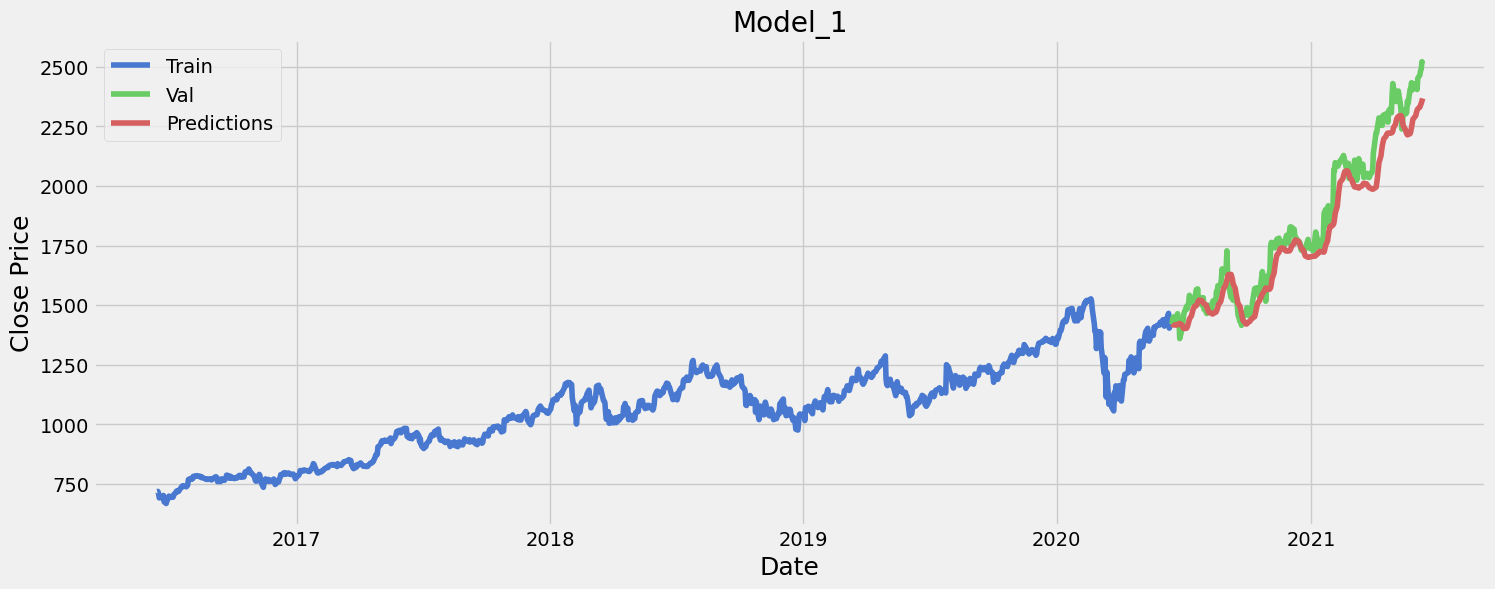

In [44]:
# Create train and val data from DataFrame
train = df2.filter(['close'])[:new_dataset_length]
valid = df2.filter(['close'])[new_dataset_length:]
valid['Predictions1'] = predictions1

# Visualizing the data
plt.figure(figsize=(16,6))
plt.title('Model_1')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(df1['date'].iloc[:1007],train['close'])
plt.plot(df1['date'].iloc[1007:],valid[['close', 'Predictions1']])
plt.legend(['Train', 'Val', 'Predictions'], loc='best')
plt.show()

# <p style="background-color:black; font-family:calibri; color:orange; font-size:120%; text-align:center; border-radius:30px 30px;">5_2. Creating Model by GRU</p>

In [45]:
# Creat RNN
RNN2 = tf.keras.models.Sequential()


In [46]:
# The First GRU Layer
RNN2.add(tf.keras.layers.GRU(units=130, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))

In [47]:
# The Second GRU Layer
RNN2.add(tf.keras.layers.GRU(units=65, return_sequences=False, activation='tanh'))

In [48]:
# The Connection
RNN2.add(tf.keras.layers.Dense(units=30))

In [49]:
# The Output layer
RNN2.add(tf.keras.layers.Dense(units=1))

In [50]:
# Compiling The RNN
RNN2.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])


In [51]:
# Compiling The RNN
RNN2.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])


In [52]:
# Fitting Model on The Train and Validation Dataset
Model_2 = RNN2.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size=32, epochs=10)

Epoch 1/10
31/31 [==============================] - 5s 32ms/step - loss: 0.0108 - accuracy: 0.0000e+00 - val_loss: 3478036.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
31/31 [==============================] - 0s 8ms/step - loss: 3.9824e-04 - accuracy: 0.0000e+00 - val_loss: 3477761.0000 - val_accuracy: 0.0000e+00
Epoch 3/10
31/31 [==============================] - 0s 9ms/step - loss: 1.9487e-04 - accuracy: 0.0000e+00 - val_loss: 3477810.2500 - val_accuracy: 0.0000e+00
Epoch 4/10
31/31 [==============================] - 0s 8ms/step - loss: 1.8516e-04 - accuracy: 0.0000e+00 - val_loss: 3477808.0000 - val_accuracy: 0.0000e+00
Epoch 5/10
31/31 [==============================] - 0s 8ms/step - loss: 1.8311e-04 - accuracy: 0.0000e+00 - val_loss: 3477829.0000 - val_accuracy: 0.0000e+00
Epoch 6/10
31/31 [==============================] - 0s 8ms/step - loss: 1.7399e-04 - accuracy: 0.0000e+00 - val_loss: 3477817.0000 - val_accuracy: 0.0000e+00
Epoch 7/10
31/31 [==============================] - 0s 

In [53]:
# Get The Models Predicted Price Values 
predictions2 = RNN2.predict(X_test)
# Converting scaled number to actual number
predictions2 = scaler.inverse_transform(predictions2)

8/8 [==============================] - 1s 3ms/step


In [54]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, predictions2)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, predictions2)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, predictions2))}')
print(f'R2_Score: {metrics.r2_score(y_test, predictions2)}')

Mean Absolute Error: 52.44590705537227
Mean Squared Error: 4172.880949462504
Root Mean Squared Error: 64.59784013001135
R2_Score: 0.9602243378267565


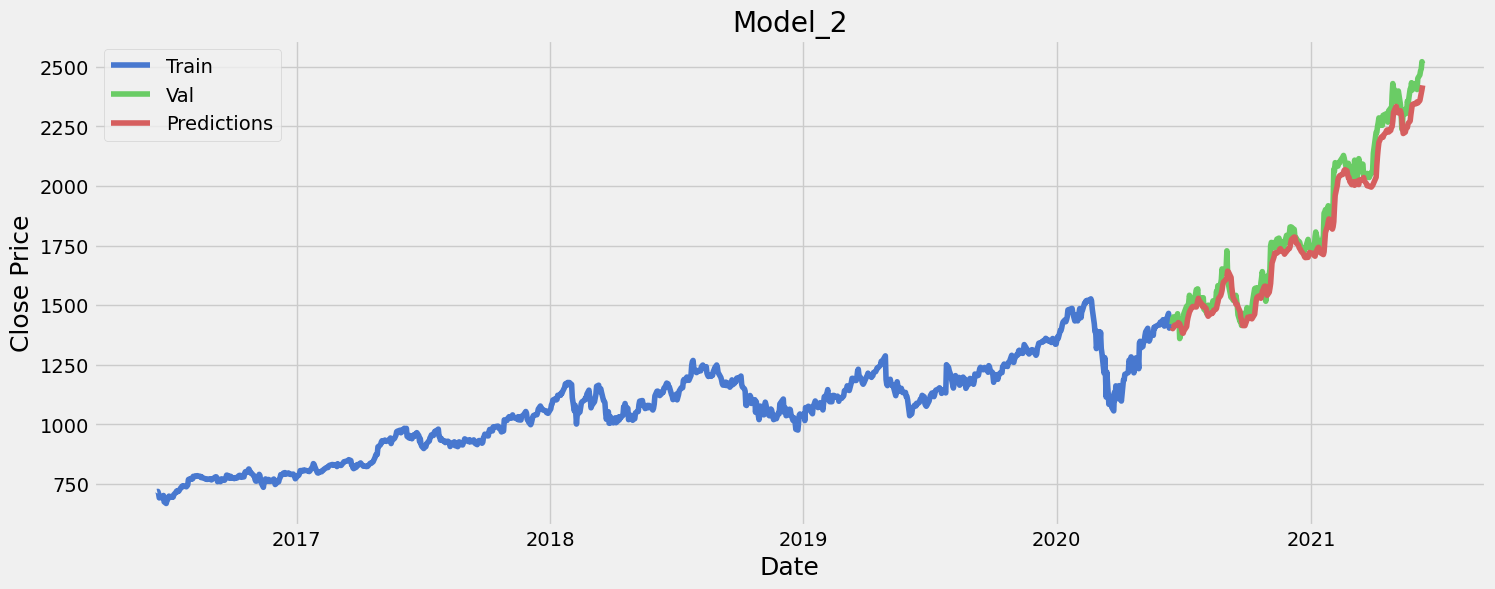

In [55]:
# Create train and val data from DataFrame
train = df2.filter(['close'])[:new_dataset_length]
valid = df2.filter(['close'])[new_dataset_length:]
valid['Predictions2'] = predictions2

# Visualizing the data
plt.figure(figsize=(16,6))
plt.title('Model_2')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(df1['date'].iloc[:1007],train['close'])
plt.plot(df1['date'].iloc[1007:],valid[['close', 'Predictions2']])
plt.legend(['Train', 'Val', 'Predictions'], loc='best')
plt.show()

# <p style="background-color:black; font-family:calibri; color:orange; font-size:120%; text-align:center; border-radius:30px 30px;">5_3. Creating Model by LSTM & Bidirectional</p>

In [56]:
# Creat RNN
RNN3 = tf.keras.models.Sequential()

In [57]:
# The First Bidirectional & LSTM  Layer
RNN3.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=130, return_sequences=True, input_shape=(X_train.shape[1],1))))

In [58]:
# The Second Bidirectional & LSTM Layer
RNN3.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=65, return_sequences=False)))

In [59]:
# The Connection
RNN3.add(tf.keras.layers.Dense(units=30))

In [60]:
# The Output layer
RNN3.add(tf.keras.layers.Dense(units=1))

In [61]:
# Compiling The RNN
RNN3.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [62]:
# Fitting Model on The Train and Validation Dataset
Model_3 = RNN2.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size=32, epochs=10)

Epoch 1/10
31/31 [==============================] - 0s 10ms/step - loss: 1.6087e-04 - accuracy: 0.0000e+00 - val_loss: 3477784.5000 - val_accuracy: 0.0000e+00
Epoch 2/10
31/31 [==============================] - 0s 10ms/step - loss: 1.4578e-04 - accuracy: 0.0000e+00 - val_loss: 3477823.2500 - val_accuracy: 0.0000e+00
Epoch 3/10
31/31 [==============================] - 0s 8ms/step - loss: 1.4503e-04 - accuracy: 0.0000e+00 - val_loss: 3477785.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
31/31 [==============================] - 0s 8ms/step - loss: 1.4558e-04 - accuracy: 0.0000e+00 - val_loss: 3477806.0000 - val_accuracy: 0.0000e+00
Epoch 5/10
31/31 [==============================] - 0s 9ms/step - loss: 1.3732e-04 - accuracy: 0.0000e+00 - val_loss: 3477837.5000 - val_accuracy: 0.0000e+00
Epoch 6/10
31/31 [==============================] - 0s 8ms/step - loss: 1.4065e-04 - accuracy: 0.0000e+00 - val_loss: 3477836.0000 - val_accuracy: 0.0000e+00
Epoch 7/10
31/31 [==============================] 

In [63]:
# Get The Models Predicted Price Values 
predictions3 = RNN3.predict(X_test)
# Converting scaled number to actual number
predictions3 = scaler.inverse_transform(predictions3)

8/8 [==============================] - 3s 5ms/step


In [64]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, predictions3)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, predictions3)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, predictions3))}')
print(f'R2_Score: {metrics.r2_score(y_test, predictions3)}')

Mean Absolute Error: 1082.4014012699204
Mean Squared Error: 1262784.0072523027
Root Mean Squared Error: 1123.736627173958
R2_Score: -11.03678482049961


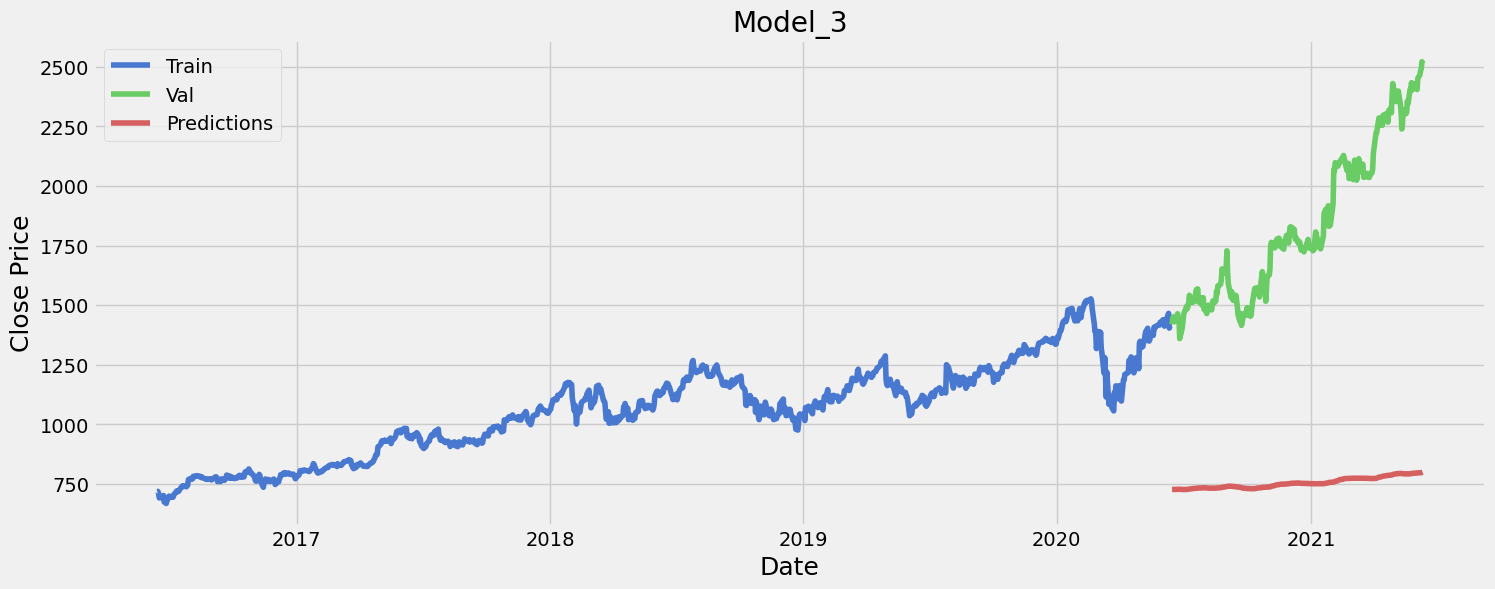

In [65]:
# Create train and val data from DataFrame
train = df2.filter(['close'])[:new_dataset_length]
valid = df2.filter(['close'])[new_dataset_length:]
valid['Predictions3'] = predictions3

# Visualizing the data
plt.figure(figsize=(16,6))
plt.title('Model_3')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(df1['date'].iloc[:1007],train['close'])
plt.plot(df1['date'].iloc[1007:],valid[['close', 'Predictions3']])
plt.legend(['Train', 'Val', 'Predictions'], loc='best')
plt.show()

# <p style="background-color:black; font-family:calibri; color:orange; font-size:120%; text-align:center; border-radius:30px 30px;">5_4. Creating Model by LSTM & GRU </p>

In [66]:
# Creat RNN
RNN4 = tf.keras.models.Sequential()

In [67]:
# The First Layer of LSTM 
RNN4.add(tf.keras.layers.LSTM(units=130, return_sequences=True, input_shape=(X_train.shape[1],1)))

In [68]:
# The Second Layer of GRU 
RNN4.add(tf.keras.layers.GRU(units=65, return_sequences=False, activation='tanh'))

In [69]:
# The Connection
RNN4.add(tf.keras.layers.Dense(units=30))

In [70]:
# The Output layer
RNN4.add(tf.keras.layers.Dense(units=1))

In [71]:
# Compiling The RNN
RNN4.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [72]:
# Fitting Model on The Train and Validation Dataset
Model_4 = RNN4.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size=32, epochs=10)

Epoch 1/10
31/31 [==============================] - 5s 30ms/step - loss: 0.0070 - accuracy: 0.0000e+00 - val_loss: 3478159.5000 - val_accuracy: 0.0000e+00
Epoch 2/10
31/31 [==============================] - 0s 9ms/step - loss: 3.9885e-04 - accuracy: 0.0000e+00 - val_loss: 3477807.0000 - val_accuracy: 0.0000e+00
Epoch 3/10
31/31 [==============================] - 0s 11ms/step - loss: 2.8762e-04 - accuracy: 0.0000e+00 - val_loss: 3477827.7500 - val_accuracy: 0.0000e+00
Epoch 4/10
31/31 [==============================] - 0s 9ms/step - loss: 2.7580e-04 - accuracy: 0.0000e+00 - val_loss: 3477882.7500 - val_accuracy: 0.0000e+00
Epoch 5/10
31/31 [==============================] - 0s 8ms/step - loss: 2.6888e-04 - accuracy: 0.0000e+00 - val_loss: 3477803.7500 - val_accuracy: 0.0000e+00
Epoch 6/10
31/31 [==============================] - 0s 9ms/step - loss: 2.7887e-04 - accuracy: 0.0000e+00 - val_loss: 3477822.2500 - val_accuracy: 0.0000e+00
Epoch 7/10
31/31 [==============================] - 0s

In [73]:
# Get The Models Predicted Price Values 
predictions4 = RNN4.predict(X_test)
# Converting scaled number to actual number
predictions4 = scaler.inverse_transform(predictions4)

8/8 [==============================] - 1s 3ms/step


In [74]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, predictions4)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, predictions4)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, predictions4))}')
print(f'R2_Score: {metrics.r2_score(y_test, predictions4)}')

Mean Absolute Error: 47.57124383326071
Mean Squared Error: 3802.4724959380783
Root Mean Squared Error: 61.66419135882735
R2_Score: 0.9637550499874757


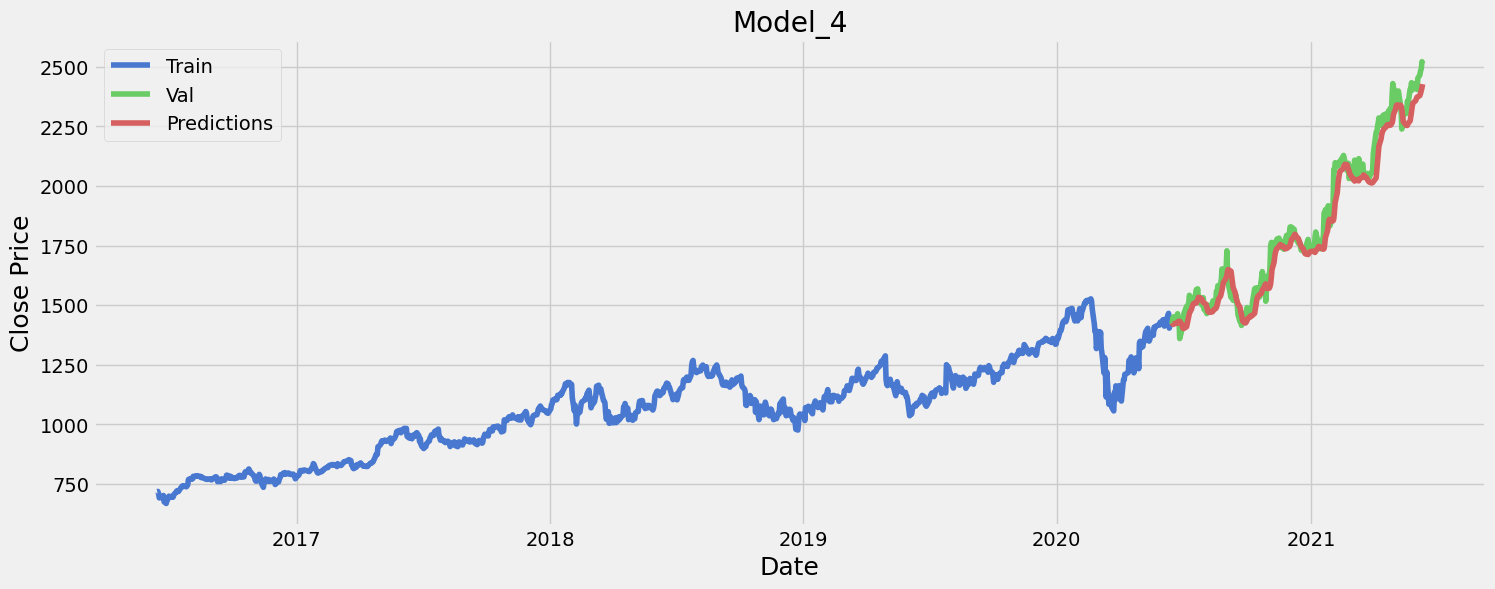

In [75]:
# Create train and val data from DataFrame
train = df2.filter(['close'])[:new_dataset_length]
valid = df2.filter(['close'])[new_dataset_length:]
valid['Predictions4'] = predictions4

# Visualizing the data
plt.figure(figsize=(16,6))
plt.title('Model_4')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(df1['date'].iloc[:1007],train['close'])
plt.plot(df1['date'].iloc[1007:],valid[['close', 'Predictions4']])
plt.legend(['Train', 'Val', 'Predictions'], loc='best')
plt.show()

In [76]:
# Save all of Models for WebApp or other predictions
joblib.dump(Model_1, 'model1')
joblib.dump(Model_2, 'model2') # The best model with almost 98% accuracy
joblib.dump(Model_4, 'model4')

['model4']